In [567]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model 

In [568]:
df = pd.read_csv('homeprices1.csv')
df


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


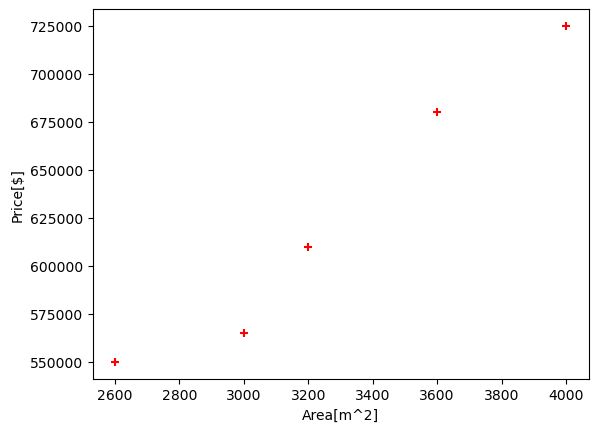

In [569]:
plt.scatter(df.area,df.price,color = 'red', marker = '+')
plt.xlabel('Area[m^2]')
plt.ylabel('Price[$]')
plt.show()

In [570]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)


LinearRegression()

In [571]:
x = np.array(3300).reshape(1,-1)
reg.predict(x)


array([628715.75342466])

y = x * [135.78767123] + 180616.43835616432


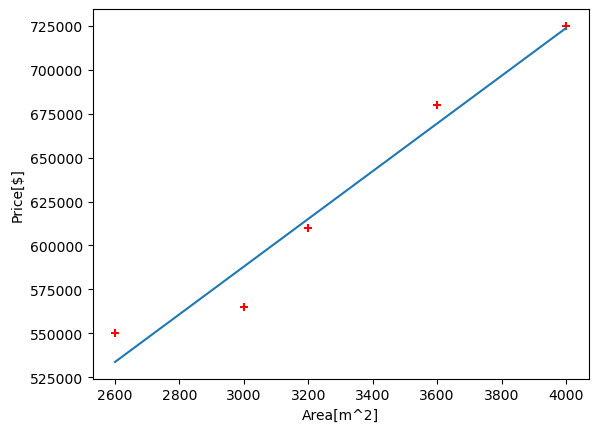

In [572]:
print('y = x *',reg.coef_,'+',reg.intercept_) #funkcjia liniowa 
# x = df.area
# y = x * reg.coef_  + reg.intercept_
# plt.plot(x,y)
plt.plot(df.area,reg.predict(df[['area']]))
plt.scatter(df.area,df.price,color = 'red', marker = '+')
plt.xlabel('Area[m^2]')
plt.ylabel('Price[$]')
plt.show()


In [599]:
d = pd.read_csv('areas.csv')
d


,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [574]:
p = reg.predict(d)

d['prices'] = p

d
d.to_csv('Predicted.csv', index = False)




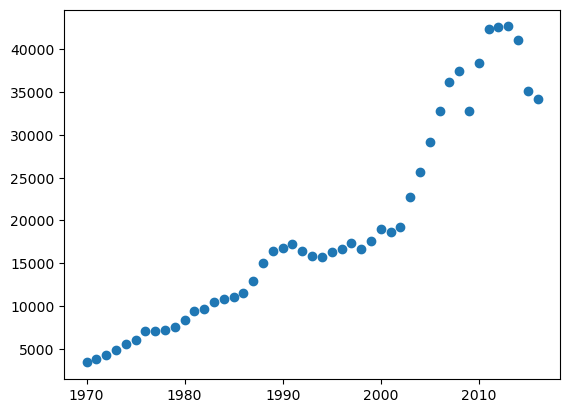

In [575]:
b = pd.read_csv('canada_per_capita_income.csv')
b
plt.scatter(b['year'],b['per capita income (US$)'])

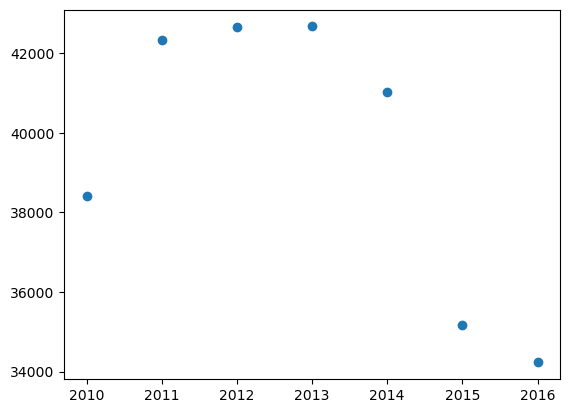

In [576]:
c = b.tail(7)
c
plt.scatter(c['year'],c['per capita income (US$)'])

In [577]:
reg1 = linear_model.LinearRegression()
reg1.fit(c[['year']],c['per capita income (US$)'])

LinearRegression()

In [578]:
reg2 = linear_model.LinearRegression()
reg2.fit(b[['year']],b['per capita income (US$)'])

LinearRegression()

In [579]:
x = np.array(2020).reshape(1,-1)
reg2.predict(x) #tu bierzemy caly okres ***dla roku 2021 oblicza idealnie

array([41288.69409442])

In [580]:
x = np.array(2020).reshape(1,-1)
reg1.predict(x) # tu bierzemy ostatnie 7 lat do regresji liniowej *** dla roku 2020 obliczylo dobrze


array([32376.29201179])

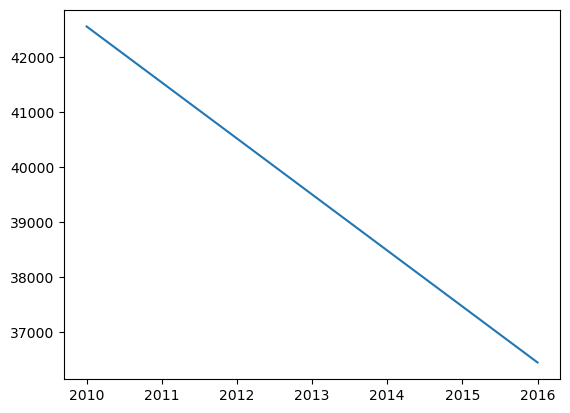

In [581]:
plt.plot(c.year,reg1.predict(c[['year']]))


In [582]:
gf = pd.read_csv('homeprices.csv')
gf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [583]:
median_bed = gf.bedrooms.median()


In [584]:
gf.bedrooms = gf.bedrooms.fillna(median_bed) #wypelnilismy mediana
gf

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [585]:
reg3 = linear_model.LinearRegression()
reg3.fit(gf[['area','bedrooms','age']],gf.price)

LinearRegression()

In [586]:
reg3.coef_ #to sa wspolczynniki m dla y=m1*area + m2* bedrooms + m3 *age +b
reg3.intercept_# to jest b

221323.0018654043

In [587]:
z = reg3.predict([[3000,3,40]])# znajdz cene domu  dla 3000m2 3 sypialnie 40 letni
y = reg3.predict([[2500,4,5]])# znajdz cene domu  dla 2500m2 4 sypialnie 5 letni
print('cena domu  dla 3000m2 3 sypialnie 40 letni',z)
print('cena domu  dla 2500m2 4 sypialnie 5 letni',y)

cena domu  dla 3000m2 3 sypialnie 40 letni [498408.25158031]
cena domu  dla 2500m2 4 sypialnie 5 letni [578876.03748933]


In [588]:
from word2number import w2n
cf = pd.read_csv('hiring.csv')
cf['experience'] = cf['experience'].fillna('zero')
median_score = cf['test_score(out of 10)'].median()
cf['test_score(out of 10)'] = cf['test_score(out of 10)'].fillna(median_score)

#cf['experience'] = w2n.word_to_num(cf['experience'])


cf.experience = cf.experience.apply(w2n.word_to_num)
cf

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [589]:
model = linear_model.LinearRegression()
model.fit(cf[['experience','test_score(out of 10)','interview_score(out of 10)']],cf['salary($)'])

LinearRegression()

In [590]:
AA = model.predict([[2,9,6]])
BB = model.predict([[12,10,10]])
import warnings

# Wyłączanie ostrzeżeń
warnings.filterwarnings("ignore")

# Twój kod, który generuje ostrzeżenia

z = int(BB)
print("predicted salary for 2 years of exp 9 and 6 scores on tests is:",int(AA),'$',"\n","predicted salary for 12 years of exp 10 and 10 scores on tests is:",int(BB),'$')

predicted salary for 2 years of exp 9 and 6 scores on tests is: 53205 $ 
 predicted salary for 12 years of exp 10 and 10 scores on tests is: 92002 $


In [591]:
import pickle

In [592]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [593]:
with open('model_pickle','rb') as f:
        mp =pickle.load(f)

In [597]:
mp.predict([[3,9,6]])
# mp.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])